$\textbf{GOAL}$ Find the value of $\lambda^{\text{QUT}}$ for a given problem

We have a problem under the form, where we want minimize a cost function, 
$$\min_\theta f+\lambda g$$

with
+ $\theta$ representing parameters of our models but g don't necessary penalize all parameters (like intercept for linear model)
+ $f$ the loss function (noted $\mathcal{L}_n$, n for the number of data)
+ $g$ the penalty (noted $P$ in the paper)
+ $\lambda$ an hyperparameter to optimize (generally, it hasn't closed form) and get a low cost function value.

In the paper, $\mu$ is too defined and it corresponds to the prediction of the model, the forward pass for ANN (so linear model). Then, the loss function is the error between the true vector and its prediction.

g is there to penalize only parameters depending directly on inputs. Like in an neural network, we pass to g only the first layer or in a linear model all parameters except intercept.

To choose this hyperparameter, usually we used over a grid of $\lambda$ and we choose according to the best score (low cost function value) :
+ Cross-validation
+ BIC
+ AIC

<span style="color:red"><b>TODO :</b></span> : Comprendre lors de la premiere réunion, le point du vue de voir LASSO (ou sqrtLASSO) comme un critere d'information + que le $log(n)$ dans BIC ne fait pas sens car $\lambda^{QUT}$ ne se comporte pas ainsi (le rapport entre ce $\log(n)$ et $\lambda^{QUT}$ ?)

So harderLASSO.pdf suggests a way to get this hyperparameter, $\lambda^{QUT}$  
We give definitions to set on case where the choice is possible.

---

$\textbf{Definition :}$ The penalty $g$ is $\emph{sparsity inducing penalty}$ if there exists a $\lambda>0$ such that when ""important"" parameters (not intercept for instance) are set to 0 makes a local minimimum local minimum.  

The infinimum of these $\lambda$ is noted $\lambda_0^{local}$ and called $\emph{local zero-thresholding function}$.

Moreover, we have $\lambda_0$ as the infinimum of $\lambda$ such that all over it set a local minimum for "important" parameters to 0.
Its defined in *"A phase transition for finding needles in nonlinear haystacks with LASSO artificial neural networks."* as
$\sup_\theta ||f(Y,X)||_\infty$ with Y random variable defined below under null hypothesis.

<span style="color:red"><b>TODO :</b></span> : Pourquoi cette definition de $\lambda_0$ ? Est-ce qu'il est vrai qu'à droite de $\lambda_0$ on a un minmum local alors que $\lambda_0^{local}$ pas nécessairement?

We have $\lambda_0^{local}(y,X) \leq \lambda_0(y,X)$

<span style="color:red"><b>TODO :</b></span> : Bien comprendre l'utilité d'être sous l'hyptohese nulle.

$\textbf{Definition :}$ Let X a design matrice ($ n\times p$), y output vector. We defined the random variable Y *[how its really defined in general ?? need to be more precise]* under the null model. For a risk of level $\alpha$ the **Q**uantile **U**niversal **T**hreshold is the $\alpha$-upper quantile of the $\lambda_0^{local}(Y,X)$ statistic,

$$\lambda_\alpha^{QUT} := F_{\lambda_0^{local}(Y,X)}^{-1}(1-\alpha)$$

We want that our statistic be $\emph{pivotable}$, not depending on unknown parameters. 

In the following we will express parameters of our models as the tuple $\theta = (\theta_1, \theta_2)$ with parameters set to 0, $\theta_1$, and others, $\theta_2$ 

In the following, as in the paper, $X$ is **standardized** 

> Regardless of what approximation of ℓ0 is used, the penalty
is isotropic, so the columns of the input matrix X must be
rescaled, for instance by dividing them by their respective
standard deviations. Throughout the paper, we make the as-
sumption that this standardization has been performed on the
inputs.

---

$\textbf{Examples}$ 

+ Linear model : We take $f_q : \beta \mapsto ||y-c\textbf{1}-X\beta||_2^q$ and $g : \beta \mapsto ||\beta_1||_1$ with $y=c\textbf{1}+X\beta+e$ with $e$ centered $\sigma$-gaussian error.

We have, using the precedent notation, $\theta_1=\beta$ and $\theta_2=c$

$\textbf{Case 1 : }$ If $q=1$ (SQRT-LASSO) then $\lambda_0^{local} =\frac{||X^T(y-\bar{y}\textbf{1})||_\infty}{||y-\bar{y}\textbf{1}||_2}$

*Proof*  

Under the null hypothesis, we have $Y = c\textbf{1}+X\textbf{0} + e = c\textbf{1} + e \sim  \mathcal{N}(c, \sigma I_n) $  
We want find the minimal $\lambda$ such as the cost function has a local minima. So we need the gradient to be 0 and the Hessian has to be defined positively **(donc f doit etre 2 fois différentiable aux points $(0,\theta_2)$ ?)**.  
By KKT theorem, (*we want a local minima when $\theta_1=0$, so we derive not according to $\theta_2$*)
$$0 \in \partial_{\theta_1}\Bigl[ f(0, \theta_2) + \lambda g(0, \theta_2)\Bigr] \Longleftrightarrow \partial_{\theta_1} f(0, \theta_2) \in [-\lambda, \lambda]^p \tag{1}$$
Then by convexity (<span style="color:red"><b>TODO :</b></span> : je ne sais pas prouver que la matrice hessienne est (définie) positive) of the loss function, $f_q$, we have that's a local minima (still the same problem, why not global?).
So we have (and by the remrk below) $$\lambda_0^{local}(y,X) = \lambda_0(y,X) = \sup_{\theta_2} ||\partial_{\theta_1} f(0, \theta_2)||_{\infty}$$

By the chain rule, and by remarking $||r||_2 = \sqrt{\langle r,r \rangle} = \sqrt{r^Tr}, $
$$\partial_{\theta_1} f
= \partial_{y-c\textbf{1}-X\theta_1} f \cdot \partial_{\theta_1} y-c\textbf{1}-X\theta_1
= \Bigl(\frac{1}{2\sqrt{(y-c\textbf{1}-X\theta_1)^T(y-c\textbf{1}-X\theta_1)}} \cdot 2(y-c\textbf{1}-X\theta_1)^T \Bigr) \cdot (-X)
= -\frac{(y-c\textbf{1}-X\theta_1)^TX}{||y-c\textbf{1}-X\theta_1||_2}
$$
$$\partial_{\theta_1} f(0, \theta_2)
= -\frac{(y-c\textbf{1}-0)^TX}{||y-c\textbf{1}-0||_2}
$$
We got, to one transposed, and by using the fact columns of $X$ are centered ($\textbf{1}^⊤X=0$), 
$$\lambda_0^{local}(y,X)
= \sup_{\theta_2} \frac{||(y-c\textbf{1})^TX||_\infty}{||y-c\textbf{1}||_2}
= \frac{||y^TX||_\infty}{\inf_{\theta_2} ||y-c\textbf{1}||_2} =  \frac{||y^TX||_\infty}{||y-\bar{y}\textbf{1}||_2}
= \frac{||(y-\bar{y}\textbf{1}) ^TX||_\infty}{||y-\bar{y}\textbf{1}||_2} $$

$\textbf{Proposition :}$ The statistic got is $\emph{pivotable}$. 

*Proof*

We work with $Y$ the random variable not an observation.  
From the numerator we got 
$$X^T(Y-\bar{Y}\textbf{1})
= X^T\Bigl(c\textbf{1}+e-\frac{nc + \textbf{1}^Te}{n}\textbf{1} \Bigr)
= X^T\Bigl(e-\frac{\textbf{1}^Te\textbf{1}}{n} \Bigr)
= X^T\Bigl(I-\frac{\textbf{1}\textbf{1}^T}{n} \Bigr)e
= X^TH\sigma u
$$
Denoting $H:=I-\frac{\textbf{1}\textbf{1}^T}{n}$ and $u := \frac{e}{\sigma}\sim \mathcal{N}(0,I)$

So, $$\lambda_0^{local}(y,X) = \frac{||X^TH\sigma u||_\infty}{||H\sigma u||_2} =  \frac{||X^THu||_\infty}{||Hu||_2}$$

And we see it doesn't depend on unknown variable (like $\sigma$) !!

<span style="color:red"><b>TODO :</b></span> chercher s'il existe une loi pour cette variable aléatoire.

$\textbf{Case 2:}$ If $q=2$ (LASSO) then  $\lambda_0^{local}(y,X) = 2||X^T(y-\bar{y}\textbf{1})||_\infty$

The start is similar to case 1, so we have only to compute $\sup_{\theta_2} ||\partial_{\theta_1} f(0, \theta_2)||_{\infty}$

$$\partial_{\theta_1} f 
= \partial_{y-c\textbf{1}-X\theta_1} f \cdot \partial_{\theta_1} y-c\textbf{1}-X\theta_1
= 2(y-c\textbf{1}-X\theta_1)^T\cdot(-X)
$$

$$\partial_{\theta_1} f(0, \theta_2) = -2(y-c\textbf{1})^TX$$

We got, to one transposed, and by using the fact columns of $X$ are centered ($\textbf{1}^⊤X=0$), 
$$\lambda_0^{local}(y,X)
= \sup_{\theta_2}  ||-2(y-c\textbf{1})^TX||_\infty
= 2||y^TX||_\infty
= 2||X^T(y-\bar{y}\textbf{1})||_\infty
$$

$\textbf{Proposition :}$ The statistic got is **not** $\emph{pivotable}$. 

*Proof*

We take the same Y than the precedent proposition; for case $q=1$ and we got see that,

$$\lambda_0^{local}(Y,X) = ||X^T(c\textbf{1}+e)||_\infty = ||X^Te||_\infty = \sigma ||X u||_\infty $$
with $u := \frac{e}{\sigma}\sim \mathcal{N}(0,I)$ and $X^Tu \sim \mathcal{N}(0,X^TX)$

So $\lambda_0^{local}(y,X)$ depend on $\sigma$, unknown...

$\textbf{Remark :}$ For these cases, theorem 1 (from *A phase transition for finding needles in nonlinear
haystacks with LASSO artificial neural networks*) states $\lambda_0 = \sup_{\theta_2} ||\partial_{\theta_1} f(0, \theta_2)||_{\infty}$.   

<span style="color:red"><b>TODO :</b></span> : le sup est fini ? on va dire oui car au moins $C^2$ mais à reflechir
 
Indeed, from (1) we have for each component on the gradient between $\pm \lambda$ so we take the max from them. Then the condition on $\lambda_0$ should still works on the worst case, that's to say,
$$\lambda_0 = \sup_{\theta_2} ||\partial_{\theta_1} f(0, \theta_2) ||_\infty$$

Then we need to show that's the infinimum of $\lambda$ such as all on its right create a local minima a $\theta_1 = 0$.

By definition, if we have $\lambda < \lambda_0$ there exsits a $\theta_2^*$ such as $||\partial_{\theta_1} f(0, \theta_2^*)||_\infty > \lambda$ so it doesn't verify KKT conditions so it's not a local minima 

Then, if $\lambda > \lambda_0$ so it verify the KKT conditions and by convexity, it's a local minimum (can we say global ? or we need to be strcitly convex to assure it in these cases). 

---

$\textbf{Definition :}$ A sparsity inducing penalty $g$ is QUT-Compatible with loss function $f$ if $\lambda_0^{local}$ is not constant.

<span style="color:red"><b>TODO :</b></span> : interpretation (pourquoi pas constant ?)

<span style="color:red"><b>TODO :</b></span> : Exemples : cas linéaires, ...

# Experiments

In [1]:
using LinearAlgebra, Statistics, Random, Printf, Plots

In [2]:
include("../functions/ISTA.jl")
include("../functions/metrics.jl")

import .ISTA: ista_L
import .metrics: pesr, tpr, fdr, f1score

I use in the following part ``quantile`` from Statistics *(https://docs.julialang.org/en/v1/stdlib/Statistics/)*  

> By default (alpha = beta = 1), quantiles are computed via **linear interpolation** between the points ((k-1)/(n-1), x[k]), for k = 1:n where n = length(itr). This corresponds to Definition 7 of Hyndman and Fan (1996), and is the same as the R and NumPy default.

## Data

In [3]:
"""
Simulate one synthetic dataset with s-sparse coefficients.
# Arguments:
- `n`: number of samples   
- `p`: number of features
- `s`: sparsity level (number of non-zero coefficients)
- `σ`: noise level
- `seed`: random seed for reproducibility
# Returns:
- `X`: design matrix of shape (n, p)
- `y`: response vector of shape (n,)
- `θ`: true coefficients of shape (p,)
"""
function simulate_dataset(n::Int, p::Int, s::Int, σ::Float64; seed::Int =42) 
    Random.seed!(seed)
    X = randn(n, p)
    # * Standardization
    X .-= mean(X; dims=1)
    X ./= std(X; dims=1)

    θ = zeros(p)
    support = randperm(p)[1:s]
    θ[support] .= randn(s)

    y = X*θ + σ*randn(n)
    y.-= mean(y)
    return X, y, θ
end

simulate_dataset

## LASSO (q=2)

In [4]:
"""
LASSO (q=2) : Compute the quantile of the maximum eigenvalue of the design matrix X
for a given significance level α.
The maximum eigenvalue is estimated by generating random vectors and
computing the maximum absolute value of the dot product with the design matrix.
Parameters:
- `X`: Design matrix (n x p)
- `sigma`: Noise level (standard deviation of the noise; unkown in practice)
- `B`: Number of random vectors to generate (default: 10000)
- `α`: Significance level (default: 0.05)
- `seed`: Random seed for reproducibility (default: 42)
Returns:
- Quantile of the maximum eigenvalue at the (1 - α) level.
"""
function lambda_qut_q2(X, sigma::Float64; B::Int=1000, α::Float64=0.05, seed::Int=42)
    Random.seed!(seed)  # For reproducibility

    n, p = size(X)
    λs = [2*sigma*maximum(abs.(X'*randn(n))) for _ in 1:B]
    return quantile(λs, 1-α)
end



lambda_qut_q2

### Oracle

For a special configuration given and enough iterations (to simulate $λ^{QUT}$ and to score according to metrics) we got satsifying result on score (plausible and encouraging) 

In [32]:
n = 100 # number of observations
p = 200 # number of variables
s = 5 # sparsity level
σ = 0.1 # oracle noise std
α = 0.05 # desired test level
B_qut = 100 # simulations for λ_QUT
R = 10 # Monte‑Carlo reps
;

In [33]:
metric_names = ["pesr", "tpr", "fdr", "f1"]
metrics_res  = zeros(R, length(metric_names))

for r in 1:R
    X, y, θ_true = simulate_dataset(n, p, s, σ; seed=Int(42+r))
    λ = lambda_qut_q2(X, σ; B=B_qut, α=α, seed=Int(42+r)) # λ_QUT

    # LASSO components :: see the notebook on ISTA for details on LASSO
    f(θ)= norm(y - X * θ)^2
    ∇f(θ) = 2*X' * (X * θ - y)
    g(θ) = λ*sum(abs.(θ))
    prox(u, step) = sign.(u).*max.(abs.(u).-step*λ, 0.0)
    L = opnorm(X)^2
    θ_hat = ista_L(zeros(p), f, g, ∇f, L, prox; max_iter=20_000, tol=1e-8, verbose=false)

    y_bool = abs.(θ_true) .> 0
    ŷ_bool = abs.(θ_hat) .> 0

    metrics_res[r,1] = pesr(θ_true, θ_hat)
    metrics_res[r,2] = tpr(y_bool, ŷ_bool)
    metrics_res[r,3] = fdr(y_bool, ŷ_bool)
    metrics_res[r,4] = f1score(y_bool, ŷ_bool)
end

mean_metrics = vec(mean(metrics_res; dims=1))
for (n,v) in zip(metric_names, mean_metrics)
    println(rpad(n,5), round(v, digits=3))
end


pesr 0.2
tpr  0.96
fdr  0.199
f1   0.869


#### Null model verification

Be aware, a confusing notaiton state that p is the number of variables but in the code we denote p the number of variables "dependent directly" on inputs. That's to say if we consider intercept, the design matrix will not be $n\times p$ but $n\times (p+1)$ 

$\textbf{Theorem}$ [Some condition we verify for this notebook] - Under the null model the error of type I is controlled at risk $\alpha$; i.e.
$$\mathbb{P_{\mathbb{H}_0}}\Bigl(\text{f+g admits a local minima and [??] is constant}\Bigr)\geq 1 - \alpha $$

<span style="color:red"><b>TODO :</b></span> On vérifie bien toutes les conditions ? (par exemple (10) ?) + les expliciter un minimum

> Theorem 2 : A phase transition for finding needles in nonlinear haystacks with LASSO artificial neural networks.

In [49]:
R_null = 100 # number of iterations on differents null models
c = 4.0 # intercept
false_rejections = 0
tol = 1e-12

n_print = 10 # print every n_print iterations

for i in 1:R_null
    # standadization
    X = randn(n, p)
    X .-= mean(X; dims=1)
    X ./= std(X;  dims=1)
    X̃ = hcat(X, ones(n)) # we have intercept (θ₂) so it corresponds to 1

    y = σ * randn(n) .+ c

    λ = lambda_qut_q2(X, σ; B=B_qut, α=α, seed=42+i)

    f(θ) = 0.5 * norm(y - X̃*θ)^2
    ∇f(θ) = X̃'*(X̃*θ - y)
    function prox(u, step) # prox is for penalty so only for θ
        soft(x, step) = sign(x)*max(abs(x)-step*λ, 0.0)
        return soft(u, step)
        # TODO : comprendre pourquoi on a pas besoin d'en dessous ?? ça minimise ou pas selon theta_2 ??
        # v = similar(u)
        # for j in 1:p_slope
        #     v[j] = soft(u[j], step)
        # end
        # v[end] = u[end] # intercept untouched
        # return v
    end
    g(θ) = λ * sum(abs.(θ[1:p_slope])) # only θ₁ is penalized
    L = opnorm(X̃)^2
    θ_hat = ista_L(zeros(p_slope+1), f, g, ∇f, L, prox; max_iter=10_000, tol=1e-8, verbose=false)

    if i % n_print == 0
        @printf("Null model %2d: ‖θ̂₁‖ = %.3e, |θ̂₂| = %.3f\n", i, norm(θ_hat[1:p_slope]), abs(θ_hat[end]))
    end

    if any(abs.(θ_hat[1:p_slope]) .> tol)  # type I check
        false_rejections += 1
    end
end

emp_level = false_rejections / R_null
println("Empirical type-I error ", round(emp_level, digits=3)," (level α = $α)")

Null model 10: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 3.941
Null model 20: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 3.935
Null model 30: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 3.926
Null model 40: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 3.929
Null model 50: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 3.914
Null model 60: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 3.938
Null model 70: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 3.928
Null model 80: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 3.939
Null model 90: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 3.922
Null model 100: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 3.917
Empirical type-I error 0.0 (level α = 0.05)


It works very well ! We got at each time a real 0 without tolerance on the check of type I. Nonetheless why the intercept is not really find ? I think it's due to the prox not well defined here !!

### Non-oracle *(consistent estimator of $\sigma$)*

<span style="color:red"><b>TODO :</b></span> Mettre un estimateur consistant et normalement la transition de phase sera derriere l'oracle. Par contre aucune idée de à quoi s'attendre ici, la meme chose ? ou le sigma mal evlaue peut faire flancher le test (erreur type I ?) ?

## Phase transition

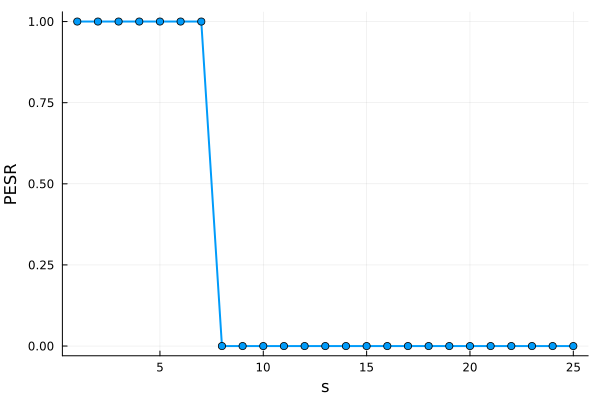

In [51]:
function run_trial(X, β, σ; α=0.05, tol=1e-6, max_iter=10_000)
    n = size(X, 1)
    y = X*β.+ σ*randn(n)
    λ = lambda_qut_q2(X, σ; α=α)
    ista_L(
        zeros(size(X, 2)),
        θ -> 0.5 * norm(X * θ - y)^2,
        θ -> λ * sum(abs.(θ)),
        θ -> X' * (X * θ - y),
        opnorm(X)^2,
        (u, step) -> sign.(u) .* max.(abs.(u) .- step * λ, 0.0);
        tol = tol,
        max_iter = max_iter,
        verbose = false,
    )
end

function phase_transition(n, p, s_list; σ=1.0, B=20, α=0.05, tol=1e-6, seed=42)
    Random.seed!(seed)
    rate = similar(collect(s_list), Float64)
    for (i, s) in pairs(s_list)
        ok = 0
        for _ in 1:B
            X = randn(n, p)
            X .-= mean(X; dims=1)
            X ./= std(X; dims=1)

            β = zeros(p); β[randperm(p)[1:s]] .= randn(s)
            β_hat = run_trial(X, β, σ; α=α, tol=tol)
            ok += pesr(β, β_hat; tol=tol)
        end
        rate[i] = ok / B
    end
    s_list, rate
end

n, p = 100, 200
s_lst = 1:25
s, rate = phase_transition(n, p, s_lst; σ=0.01, B=20)

plot(s, rate; xlabel="s", ylabel="PESR", legend=false, lw=2, marker=:circle)

## SQRT LASSO

<span style="color:red"><b>TODO :</b></span> : 
+ definir probleme lasso.
+ optimiser avec ista (i have already a function for that: ) (backtrack necessaire ?)